<a href="https://colab.research.google.com/github/saad-the-noob/Skill_Morph_Assignment/blob/main/Assignment_8_DT%2C_RF%2C_KNN%2C_SVM%2C_LR_for_EEG_Eye_State_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
                    accuracy_score, confusion_matrix, classification_report,
                    precision_score, recall_score, f1_score,
                    roc_curve, roc_auc_score, auc, ConfusionMatrixDisplay
                    )
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [8]:
# Set font size and family for all figure
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'

In [9]:
# import the dataset
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['EEG_Eye_State_Classification.csv']))

Saving EEG_Eye_State_Classification.csv to EEG_Eye_State_Classification.csv


In [10]:
# Train and Test Split
x = data.drop("eyeDetection",axis=1)
y = data['eyeDetection']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [11]:
# Standard Scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

##Decision Tree Model


Accuracy:  0.8331
Precision: 0.8329
Recall:    0.8331
F1 Score:  0.8328


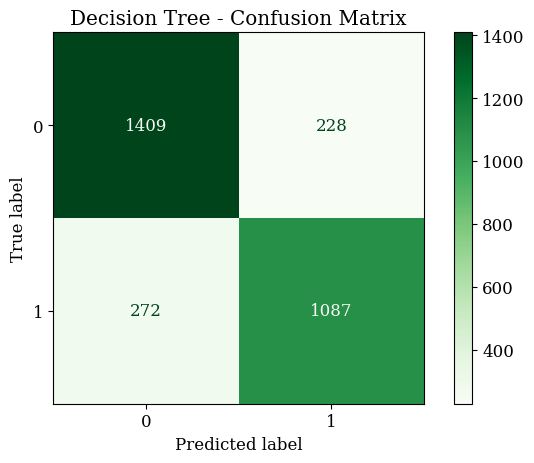

Classification Report:
              precision    recall  f1-score   support

           0    0.83819   0.86072   0.84931      1637
           1    0.82662   0.79985   0.81301      1359

    accuracy                        0.83311      2996
   macro avg    0.83240   0.83029   0.83116      2996
weighted avg    0.83294   0.83311   0.83284      2996



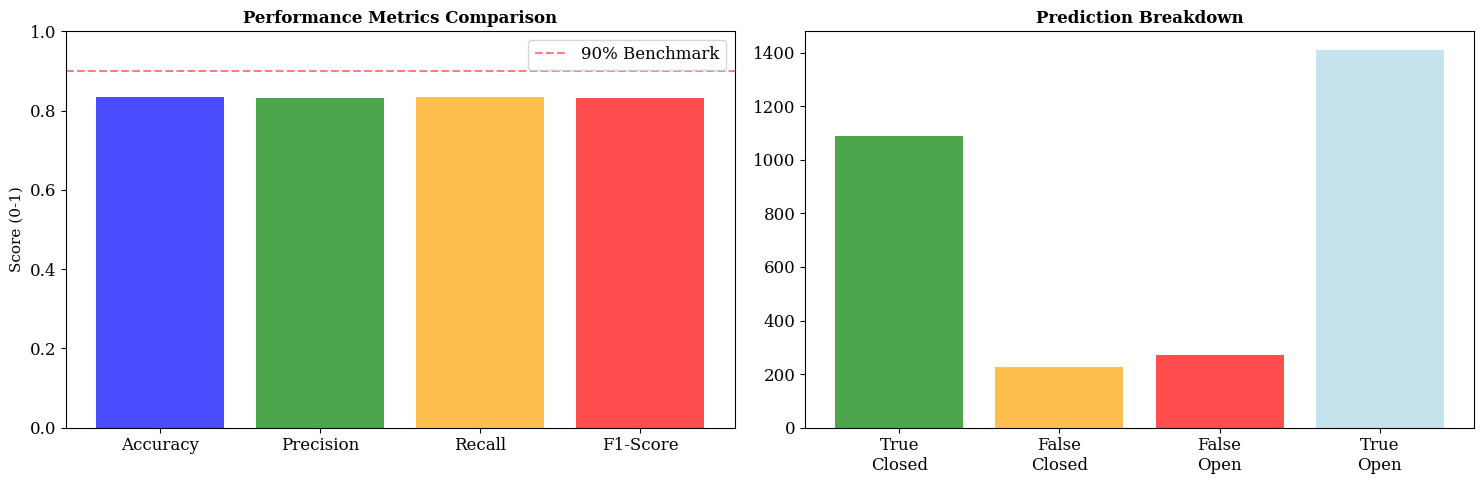

In [13]:
# 1. Train Decision Tree Classifier
dt_model = DecisionTreeClassifier( max_depth=15,random_state=42)
dt_model.fit(x_train_scaled, y_train)

# 2. Predict on Test Set
y_pred_dt = dt_model.predict(x_test_scaled)

# 3. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_dt, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_dt, average='weighted', zero_division=0)

# 4. Print Basic Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm, display_labels=dt_model.classes_).plot(cmap='Greens')
plt.title("Decision Tree - Confusion Matrix")
plt.tight_layout()
plt.show()

# 6. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt, zero_division=0, digits=5))

# 7. Detailed metrics visualization
plt.figure(figsize=(15, 5))

# Subplot 1: Metrics comparison
plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)

# Add benchmark line
plt.axhline(y=0.9, color='red', linestyle='--', alpha=0.5, label='90% Benchmark')
plt.legend()


# Subplot 2: Precision vs Recall visualization
plt.subplot(1, 2, 2)
categories = ['True\nClosed', 'False\nClosed', 'False\nOpen', 'True\nOpen']
tc, fc, fo, to = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
counts = [tc, fc, fo, to]
colors_pr = ['green', 'orange', 'red', 'lightblue']
bars_pr = plt.bar(categories, counts, color=colors_pr, alpha=0.7)
plt.title('Prediction Breakdown', fontweight='bold', fontsize=12)



plt.tight_layout()
plt.show()


##KNN Model

Accuracy:  0.91956
Precision: 0.91953
Recall:    0.91956
F1 Score:  0.91952


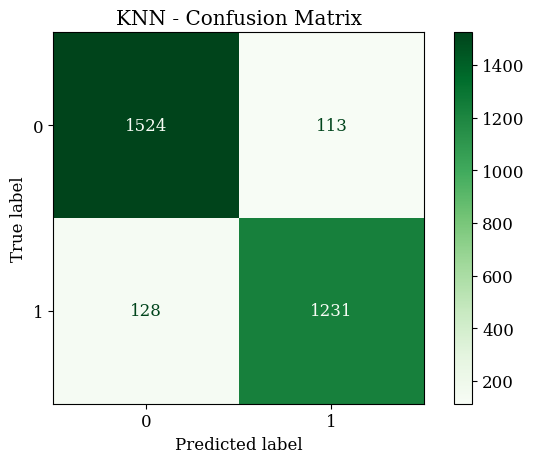

Classification Report:
              precision    recall  f1-score   support

           0    0.92252   0.93097   0.92673      1637
           1    0.91592   0.90581   0.91084      1359

    accuracy                        0.91956      2996
   macro avg    0.91922   0.91839   0.91878      2996
weighted avg    0.91953   0.91956   0.91952      2996



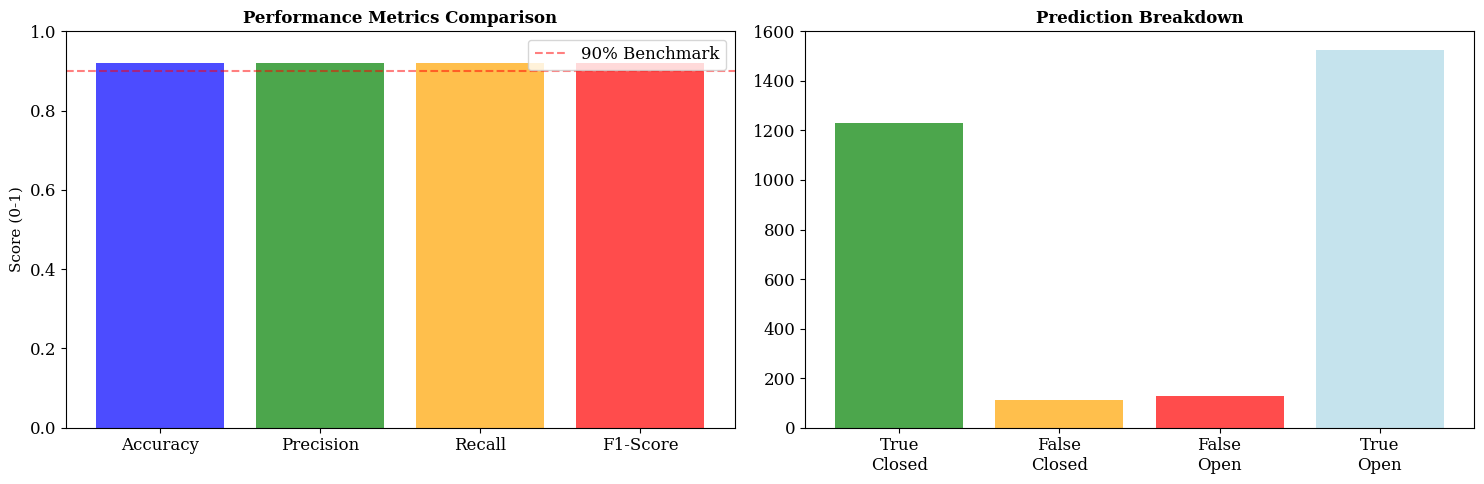

In [14]:
# 1. Train KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train_scaled, y_train)

# 2. Predict on Test Set
y_pred_knn = knn_model.predict(x_test_scaled)

# 3. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_knn, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_knn, average='weighted', zero_division=0)

# 4. Print Basic Metrics (5-digit precision)
print(f"Accuracy:  {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall:    {recall:.5f}")
print(f"F1 Score:  {f1:.5f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm, display_labels=knn_model.classes_).plot(cmap='Greens')
plt.title("KNN - Confusion Matrix")
plt.tight_layout()
plt.show()

# 6. Classification Report (5-digit precision)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn, zero_division=0, digits=5))


# 7. Detailed metrics visualization
plt.figure(figsize=(15, 5))

# Subplot 1: Metrics comparison
plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)

# Add benchmark line
plt.axhline(y=0.9, color='red', linestyle='--', alpha=0.5, label='90% Benchmark')
plt.legend()


# Subplot 2: Precision vs Recall visualization
plt.subplot(1, 2, 2)
categories = ['True\nClosed', 'False\nClosed', 'False\nOpen', 'True\nOpen']
tc, fc, fo, to = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
counts = [tc, fc, fo, to]
colors_pr = ['green', 'orange', 'red', 'lightblue']
bars_pr = plt.bar(categories, counts, color=colors_pr, alpha=0.7)
plt.title('Prediction Breakdown', fontweight='bold', fontsize=12)



plt.tight_layout()
plt.show()

##Random Forest Model

Accuracy:  0.90187
Precision: 0.90212
Recall:    0.90187
F1 Score:  0.90165


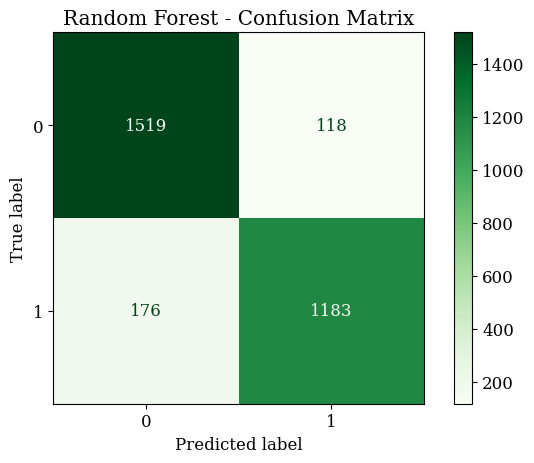

Classification Report:
              precision    recall  f1-score   support

           0    0.89617   0.92792   0.91176      1637
           1    0.90930   0.87049   0.88947      1359

    accuracy                        0.90187      2996
   macro avg    0.90273   0.89920   0.90062      2996
weighted avg    0.90212   0.90187   0.90165      2996



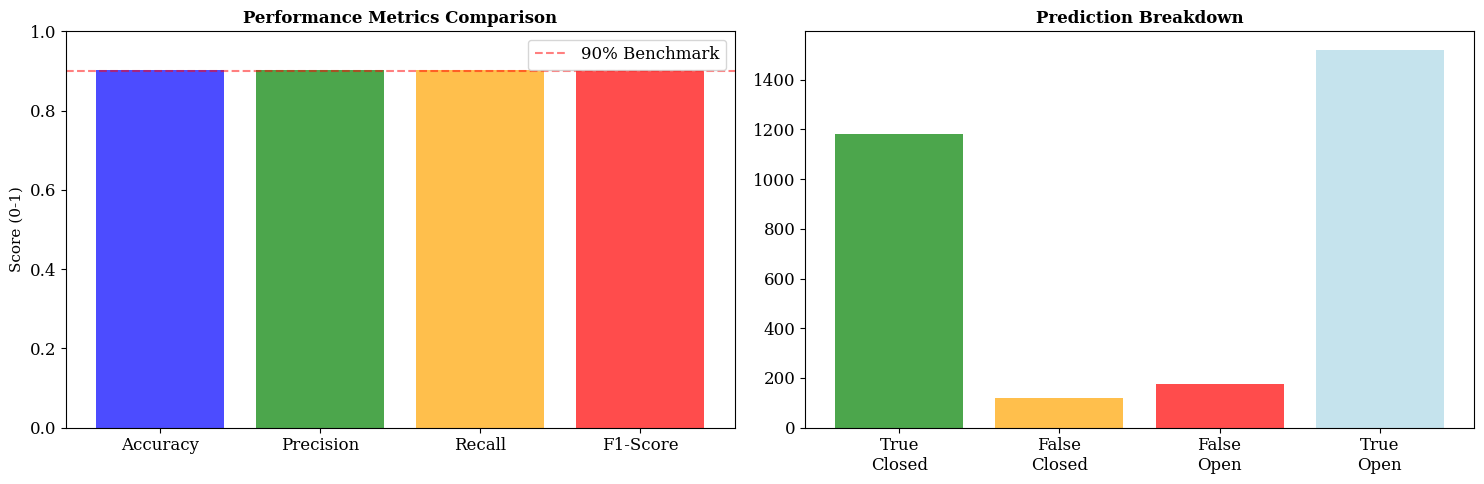

In [15]:
# 1. Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=15, random_state=42)
rf_model.fit(x_train_scaled, y_train)

# 2. Predict on Test Set
y_pred_rf = rf_model.predict(x_test_scaled)

# 3. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

# 4. Print Basic Metrics (5-digit precision)
print(f"Accuracy:  {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall:    {recall:.5f}")
print(f"F1 Score:  {f1:.5f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm, display_labels=rf_model.classes_).plot(cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.tight_layout()
plt.show()

# 6. Classification Report (5-digit precision)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0, digits=5))


# 7. Detailed metrics visualization
plt.figure(figsize=(15, 5))

# Subplot 1: Metrics comparison
plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)

# Add benchmark line
plt.axhline(y=0.9, color='red', linestyle='--', alpha=0.5, label='90% Benchmark')
plt.legend()


# Subplot 2: Precision vs Recall visualization
plt.subplot(1, 2, 2)
categories = ['True\nClosed', 'False\nClosed', 'False\nOpen', 'True\nOpen']
tc, fc, fo, to = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
counts = [tc, fc, fo, to]
colors_pr = ['green', 'orange', 'red', 'lightblue']
bars_pr = plt.bar(categories, counts, color=colors_pr, alpha=0.7)
plt.title('Prediction Breakdown', fontweight='bold', fontsize=12)



plt.tight_layout()
plt.show()

##Support Vector Machine (SVM) Model

Accuracy:  0.90187
Precision: 0.90212
Recall:    0.90187
F1 Score:  0.90165


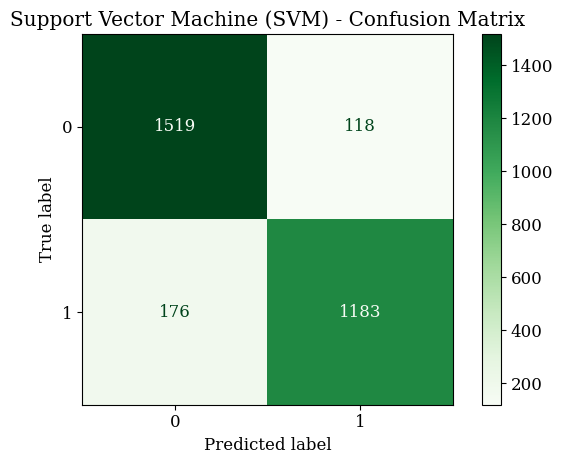

Classification Report:
              precision    recall  f1-score   support

           0    0.89617   0.92792   0.91176      1637
           1    0.90930   0.87049   0.88947      1359

    accuracy                        0.90187      2996
   macro avg    0.90273   0.89920   0.90062      2996
weighted avg    0.90212   0.90187   0.90165      2996



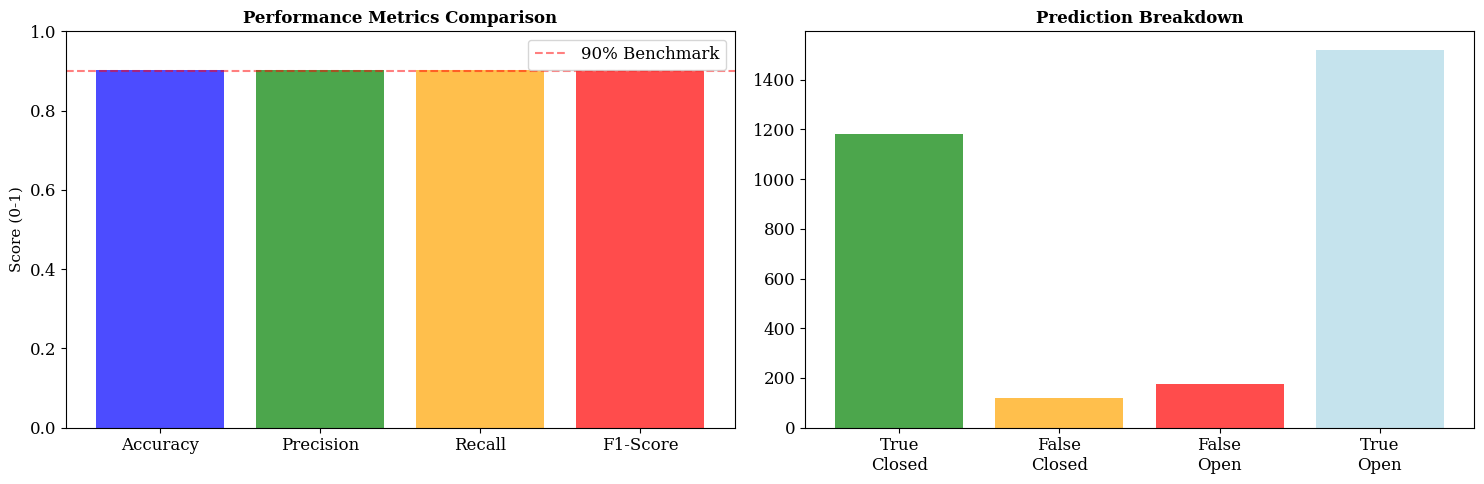

In [19]:
# 1. Train Support Vector Machine (SVM)
svm = SVC(kernel='rbf', random_state=42)
svm.fit(x_train_scaled, y_train)

# 2. Predict on Test Set
y_pred_svm = rf_model.predict(x_test_scaled)

# 3. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_svm, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_svm, average='weighted', zero_division=0)

# 4. Print Basic Metrics (5-digit precision)
print(f"Accuracy:  {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall:    {recall:.5f}")
print(f"F1 Score:  {f1:.5f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(cm, display_labels=rf_model.classes_).plot(cmap='Greens')
plt.title("Support Vector Machine (SVM) - Confusion Matrix")
plt.tight_layout()
plt.show()

# 6. Classification Report (5-digit precision)
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=0, digits=5))

# 7. Detailed metrics visualization
plt.figure(figsize=(15, 5))

# Subplot 1: Metrics comparison
plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)

# Add benchmark line
plt.axhline(y=0.9, color='red', linestyle='--', alpha=0.5, label='90% Benchmark')
plt.legend()


# Subplot 2: Precision vs Recall visualization
plt.subplot(1, 2, 2)
categories = ['True\nClosed', 'False\nClosed', 'False\nOpen', 'True\nOpen']
tc, fc, fo, to = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
counts = [tc, fc, fo, to]
colors_pr = ['green', 'orange', 'red', 'lightblue']
bars_pr = plt.bar(categories, counts, color=colors_pr, alpha=0.7)
plt.title('Prediction Breakdown', fontweight='bold', fontsize=12)



plt.tight_layout()
plt.show()

##Logistic Regression Model

Accuracy:  0.90187
Precision: 0.90212
Recall:    0.90187
F1 Score:  0.90165


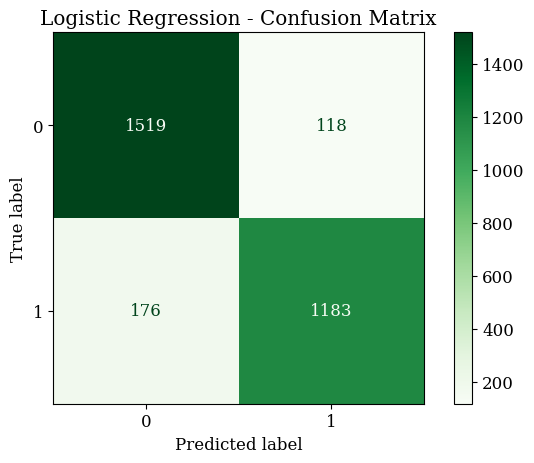

Classification Report:
              precision    recall  f1-score   support

           0    0.89617   0.92792   0.91176      1637
           1    0.90930   0.87049   0.88947      1359

    accuracy                        0.90187      2996
   macro avg    0.90273   0.89920   0.90062      2996
weighted avg    0.90212   0.90187   0.90165      2996



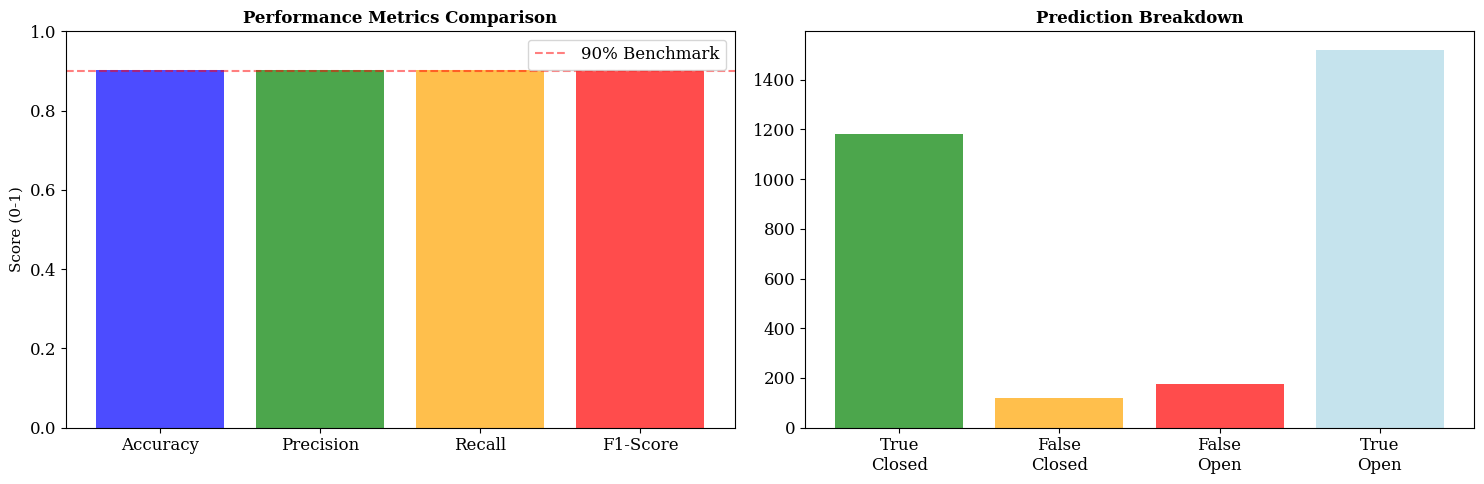

In [18]:
# 1. Train Logistic Regression
lr = LogisticRegression(max_iter=500, random_state=42)
lr.fit(x_train_scaled, y_train)

# 2. Predict on Test Set
y_pred_lr = rf_model.predict(x_test_scaled)

# 3. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_lr, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_lr, average='weighted', zero_division=0)

# 4. Print Basic Metrics (5-digit precision)
print(f"Accuracy:  {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall:    {recall:.5f}")
print(f"F1 Score:  {f1:.5f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm, display_labels=rf_model.classes_).plot(cmap='Greens')
plt.title("Logistic Regression - Confusion Matrix")
plt.tight_layout()
plt.show()

# 6. Classification Report (5-digit precision)
print("Classification Report:")
print(classification_report(y_test, y_pred_lr, zero_division=0, digits=5))

# 7. Detailed metrics visualization
plt.figure(figsize=(15, 5))

# Subplot 1: Metrics comparison
plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)

# Add benchmark line
plt.axhline(y=0.9, color='red', linestyle='--', alpha=0.5, label='90% Benchmark')
plt.legend()


# Subplot 2: Precision vs Recall visualization
plt.subplot(1, 2, 2)
categories = ['True\nClosed', 'False\nClosed', 'False\nOpen', 'True\nOpen']
tc, fc, fo, to = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
counts = [tc, fc, fo, to]
colors_pr = ['green', 'orange', 'red', 'lightblue']
bars_pr = plt.bar(categories, counts, color=colors_pr, alpha=0.7)
plt.title('Prediction Breakdown', fontweight='bold', fontsize=12)



plt.tight_layout()
plt.show()